In [1]:
#Tensorflow and tf.keras

import tensorflow as tf
from tensorflow import keras

#Helper Libraries

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.8.2


In [2]:
print(np.__version__)

1.21.6


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
train_labels.shape

(60000,)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
test_labels.shape

(10000,)

In [9]:
train_images[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 118,  24,   0,
          0,   0,   0,   0,  48,  88,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  12, 100, 212, 205, 185,
        179, 173, 186, 193, 221, 142,  85,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  85,  76, 199, 225,
        248, 255, 238, 226, 157,  68,  80,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  91,  69,  91, 201,
        218, 225, 209, 158,  61,  93,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  79,  89,  61,  59,
         87, 108,  75,  56,  76,  97,  73,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  75,  89,  80,  80,
         67,  63,  73,  83,  80,  96,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
train_labels[2]

0

Text(0.5, 1.0, '0')

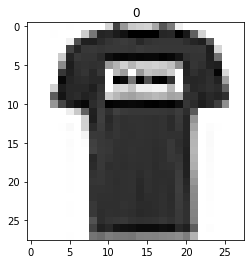

In [11]:
plt.imshow(train_images[1],cmap='gray_r')
plt.title(train_labels[1])

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
class_names=['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Snekar','Bag','Ankle boot'] # create list

In [14]:
class_names

['T-Shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Snekar',
 'Bag',
 'Ankle boot']

In [15]:
class_names[7]

'Snekar'

In [16]:
class_names[2]

'Pullover'

In [17]:
train_labels[2]

0

In [18]:
class_names[train_labels[2]]

'T-Shirt/Top'

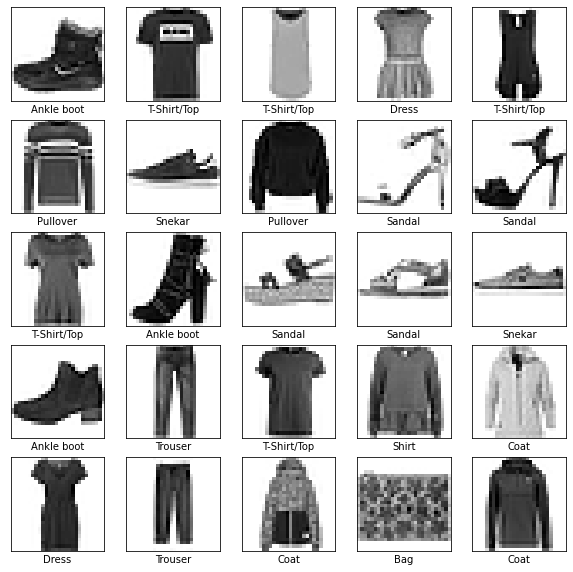

In [19]:
plt.figure(figsize=(10,10))
for i in range (25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [20]:
train_images=train_images/255.0
test_images=test_images/255.0

In [21]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(512,activation='relu'),
                          keras.layers.Dense(10,'softmax')
])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [24]:
history = model.fit(train_images,train_labels,validation_split=0.2,epochs=15,verbose=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 7s 4ms/step - loss: 0.4928 - accuracy: 0.8245 - val_loss: 0.4053 - val_accuracy: 0.8542
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3726 - accuracy: 0.8634 - val_loss: 0.3653 - val_accuracy: 0.8672
Epoch 3/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3327 - accuracy: 0.8772 - val_loss: 0.3381 - val_accuracy: 0.8783
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3061 - accuracy: 0.8860 - val_loss: 0.3472 - val_accuracy: 0.8705
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2859 - accuracy: 0.8926 - val_loss: 0.3316 - val_accuracy: 0.8823
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2694 - accuracy: 0.9000 - val_loss: 0.3131 - val_accuracy: 0.8864
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2544 - accuracy: 0.9055 - val_loss: 0.3233 - val_accuracy: 0.8843
Epo

In [25]:
history.history

{'accuracy': [0.8244583606719971,
  0.8634166717529297,
  0.8772291541099548,
  0.885979175567627,
  0.8926041722297668,
  0.9000416398048401,
  0.9054791927337646,
  0.9084374904632568,
  0.9139999747276306,
  0.9166041612625122,
  0.9209374785423279,
  0.9229583144187927,
  0.925000011920929,
  0.9277708530426025,
  0.9299583435058594],
 'loss': [0.49279841780662537,
  0.3725753724575043,
  0.3327338993549347,
  0.3061215877532959,
  0.28593531250953674,
  0.26940351724624634,
  0.2543748915195465,
  0.24465212225914001,
  0.2314329892396927,
  0.22214603424072266,
  0.213155135512352,
  0.2063540816307068,
  0.19787532091140747,
  0.19236843287944794,
  0.1864808201789856],
 'val_accuracy': [0.8541666865348816,
  0.8671666383743286,
  0.878333330154419,
  0.8705000281333923,
  0.8823333382606506,
  0.8864166736602783,
  0.8843333125114441,
  0.8880000114440918,
  0.8893333077430725,
  0.8895000219345093,
  0.8955833315849304,
  0.8918333053588867,
  0.8880000114440918,
  0.893666684

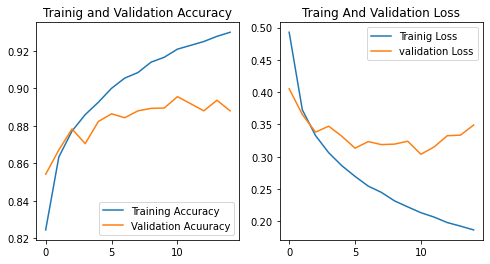

In [26]:
epochs = 15
acc = history.history['accuracy']
Val_acc = history.history['val_accuracy']

loss = history.history['loss']
Val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,Val_acc,label='Validation Acuuracy')

plt.legend(loc='lower right')
plt.title('Trainig and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Trainig Loss')
plt.plot(epochs_range,Val_loss,label='validation Loss')
plt.legend(loc='upper right')
plt.title('Traing And Validation Loss')
plt.show()

In [ ]:
#call Back Early Stopping

In [27]:
model_new = keras.Sequential([
                              keras.layers.Flatten(input_shape=(28,28)),
                              keras.layers.Dense(512,activation='relu'),
                              keras.layers.Dense(10,'softmax')
])

In [28]:
model_new.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [29]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [30]:
history = model_new.fit(train_images,train_labels,epochs=15,validation_split=0.2,callbacks=callback,verbose=1)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 7s 4ms/step - loss: 0.4916 - accuracy: 0.8241 - val_loss: 0.4086 - val_accuracy: 0.8555
Epoch 2/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3709 - accuracy: 0.8654 - val_loss: 0.4220 - val_accuracy: 0.8460
Epoch 3/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3281 - accuracy: 0.8791 - val_loss: 0.3435 - val_accuracy: 0.8753
Epoch 4/15
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3040 - accuracy: 0.8861 - val_loss: 0.3361 - val_accuracy: 0.8759
Epoch 5/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2852 - accuracy: 0.8934 - val_loss: 0.3250 - val_accuracy: 0.8818
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2699 - accuracy: 0.8992 - val_loss: 0.3282 - val_accuracy: 0.8813
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2566 - accuracy: 0.9050 - val_loss: 0.3142 - val_accuracy: 0.8858
Epo

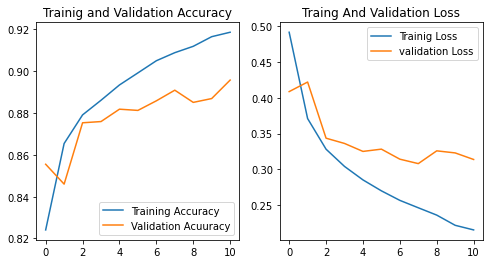

In [32]:
epochs = 11
acc = history.history['accuracy']
Val_acc = history.history['val_accuracy']

loss = history.history['loss']
Val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,Val_acc,label='Validation Acuuracy')

plt.legend(loc='lower right')
plt.title('Trainig and Validation Accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Trainig Loss')
plt.plot(epochs_range,Val_loss,label='validation Loss')
plt.legend(loc='upper right')
plt.title('Traing And Validation Loss')
plt.show()